# Spatial Temporal Validation

In [1]:
import numpy as np

In [2]:
import os
from pathlib import Path
SCRIPT_DIR = os.path.dirname(os.path.abspath("__init__.py"))
SRC_DIR = Path(SCRIPT_DIR).parent.absolute()
print(SRC_DIR)

/Users/yannis/PycharmProjects/WeRec3D/src


In [3]:
from plotting import visualize_quantitative_temporal, visualize_quantitative_spatial
from validation_helpers import scale_t2m_back, scale_slp_back

In [4]:
METHODS = ['ex1_baseline',
           'ex2_seasonal_component',
           'ex3_incremental_pretraining',
           'ex3.1_moving_window',
           'ex3.2_cm_inclusion',
           'ex3.3_elevation',
           'ex3.4_pi_init',
           'ex4.1_elev_mov_win',
           'ex4.2_elev_cmi',
           'ex4.3_elev_pi_init',
           'ex5.1_elev_mov_cmi',
           'ex5.2_elev_mov_pi',
           'ex6.1_elev_mov_cmi_pi']

FIGURE_PATH = str(SRC_DIR) + "/experiments_evaluation/figures/spatio_temporal_errors/"




=== ex1_baseline ===
Total error: 0.2143542652302966
Average t2m error: 2.48112689233671
Average slp error: 164.4635700660258



=== ex2_seasonal_component ===
Total error: 0.1653537646515859
Average t2m error: 1.689192898160735
Average slp error: 154.6115073171025



=== ex3_incremental_pretraining ===
Total error: 0.11063940136725195
Average t2m error: 0.8972150811812074
Average slp error: 132.21706288119663



=== ex3.1_moving_window ===
Total error: 0.1243938566496046
Average t2m error: 1.153604830172521
Average slp error: 130.77410821181115



=== ex3.2_cm_inclusion ===
Total error: 0.11380468090533116
Average t2m error: 0.9197137087680127
Average slp error: 136.39092589088835



=== ex3.3_elevation ===
Total error: 0.11059134599024162
Average t2m error: 0.8892897735255837
Average slp error: 133.0898117685561



=== ex3.4_pi_init ===
Total error: 0.11306821929033409
Average t2m error: 0.8931903036947977
Average slp error: 138.04761844773157



=== ex4.1_elev_mov_win ===
Total e

/Users/yannis/PycharmProjects/WeRec3D/src/experiments_evaluation/plotting.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(16, 6))





=== ex5.2_elev_mov_pi ===
Total error: 0.1084084170420762
Average t2m error: 0.9051083101848619
Average slp error: 126.34344325971063



=== ex6.1_elev_mov_cmi_pi ===
Total error: 0.10930415237565505
Average t2m error: 0.9103837200293756
Average slp error: 127.65931821760795


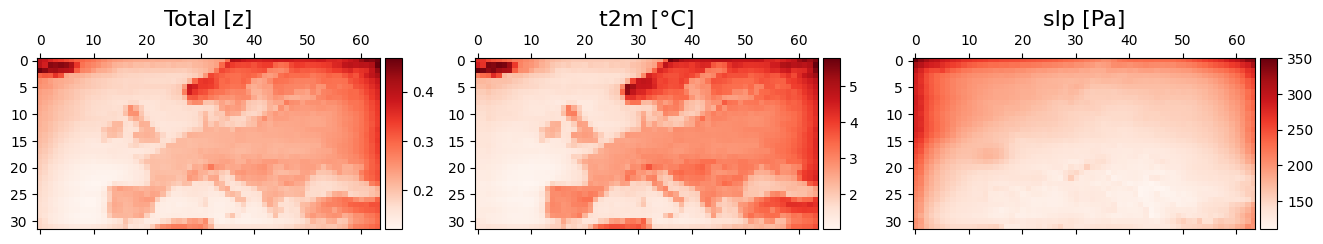

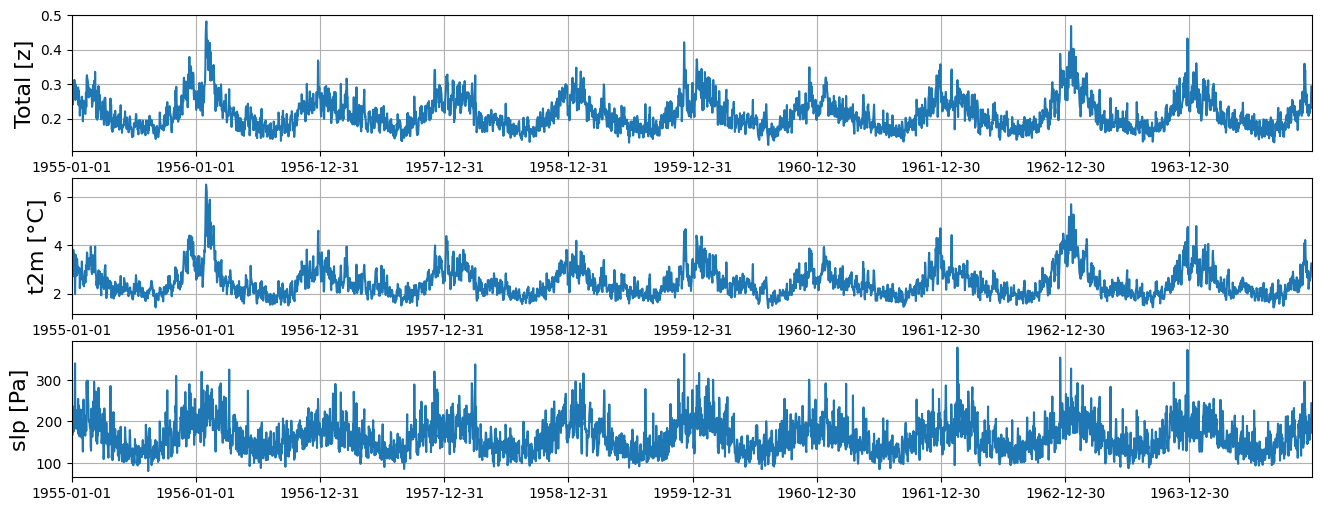

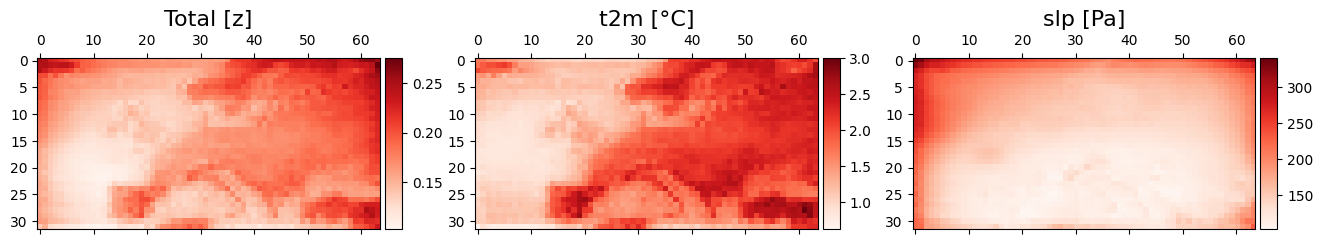

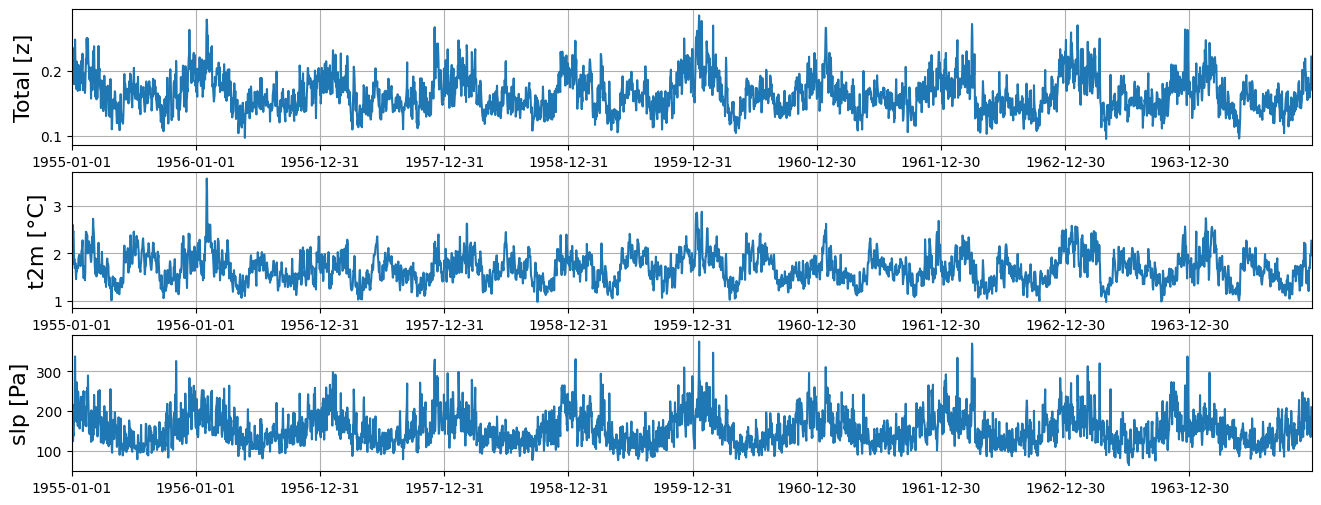

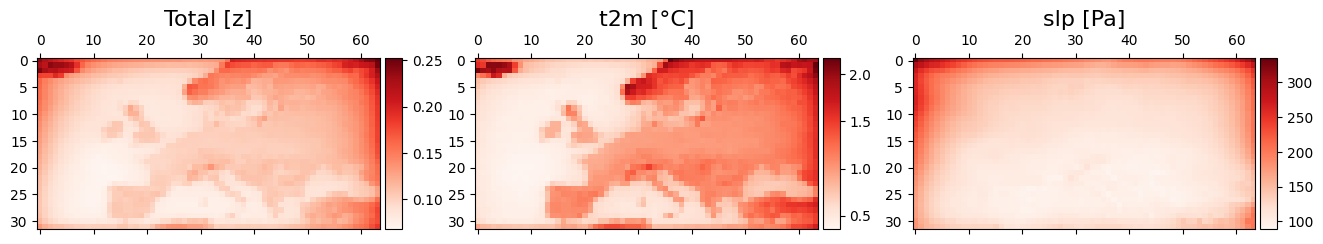

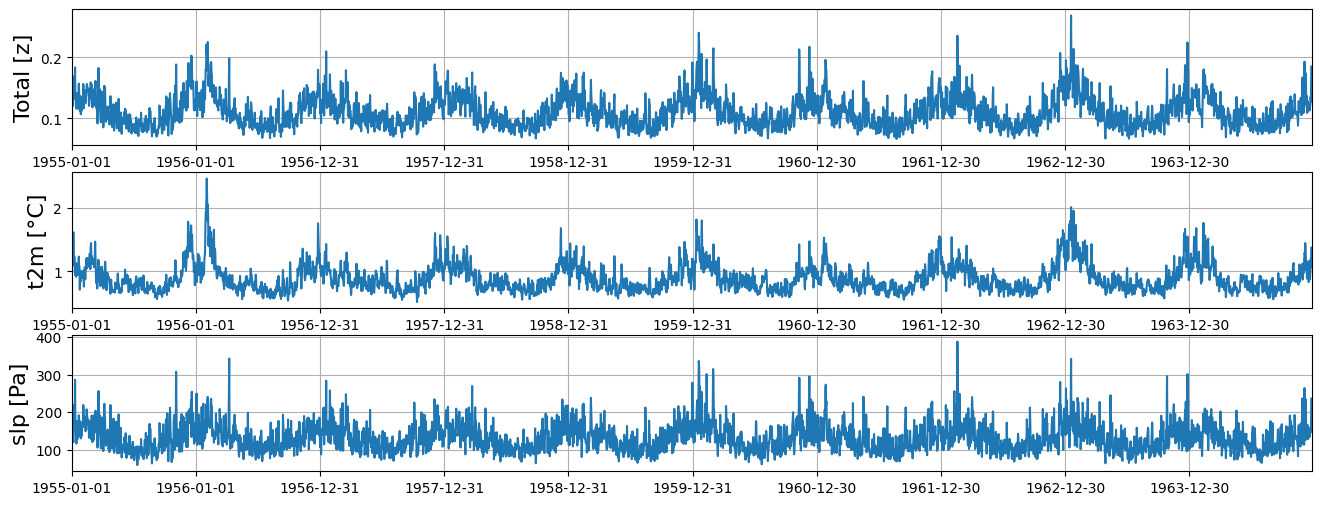

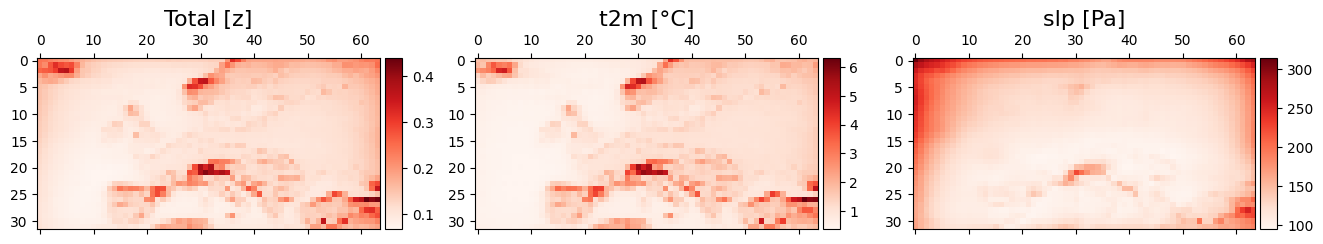

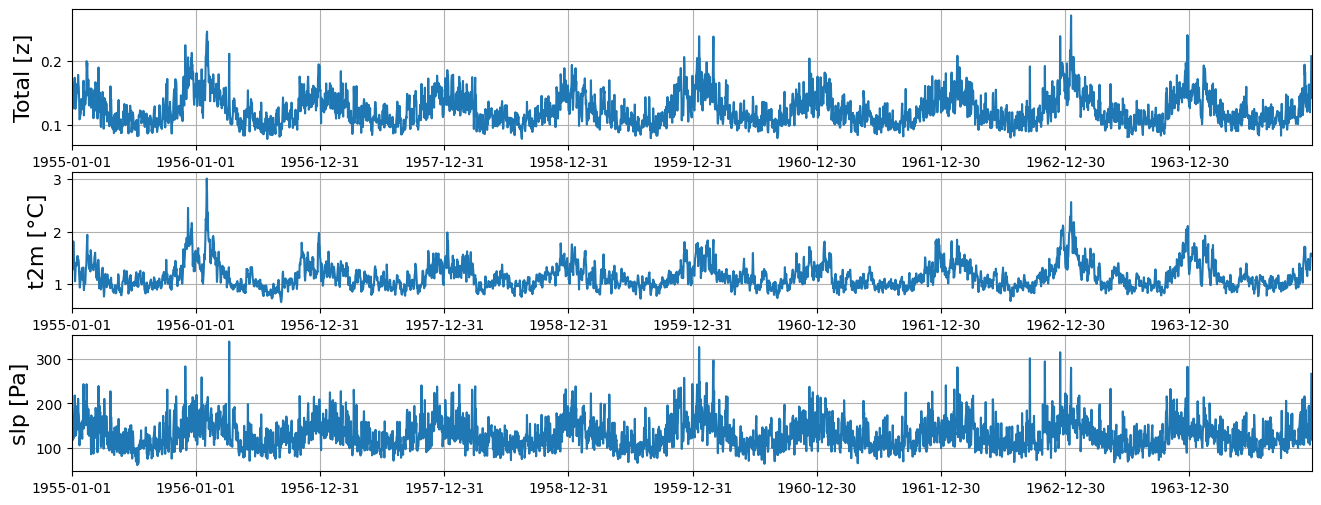

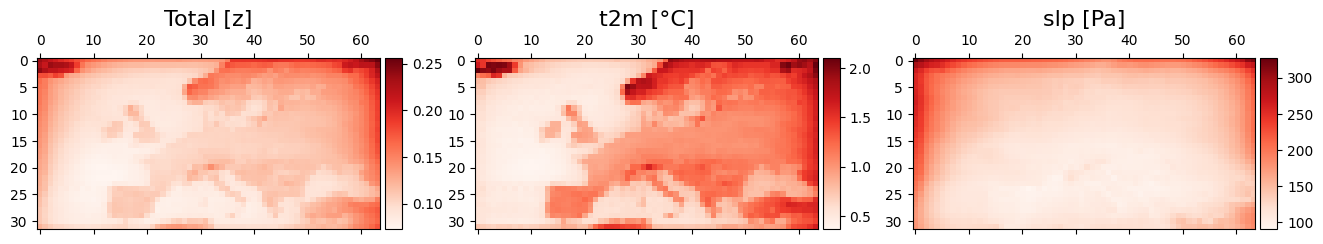

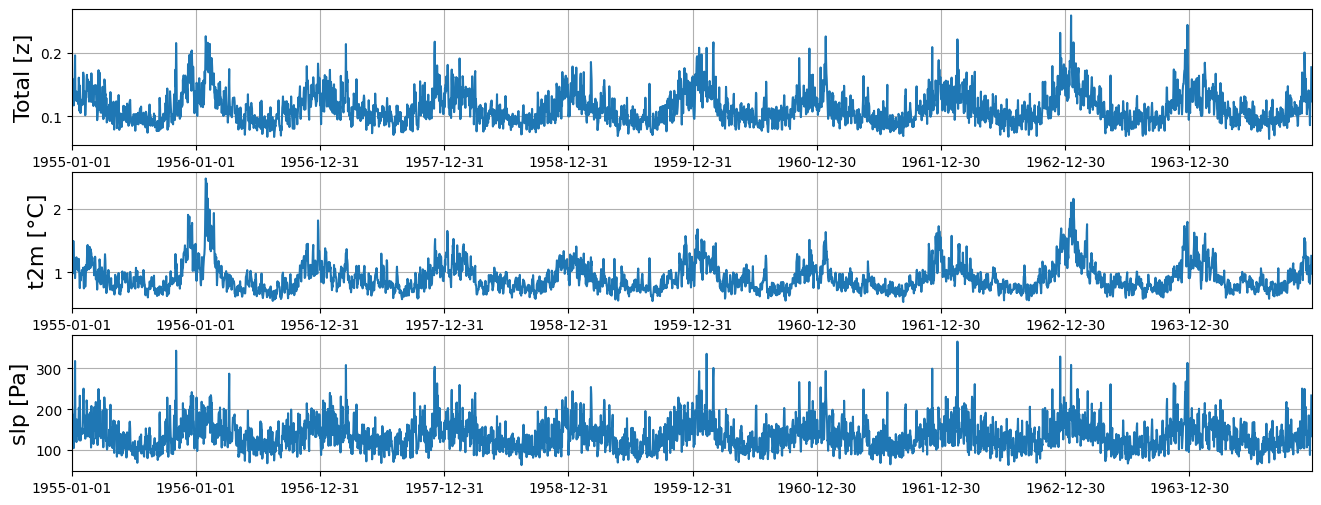

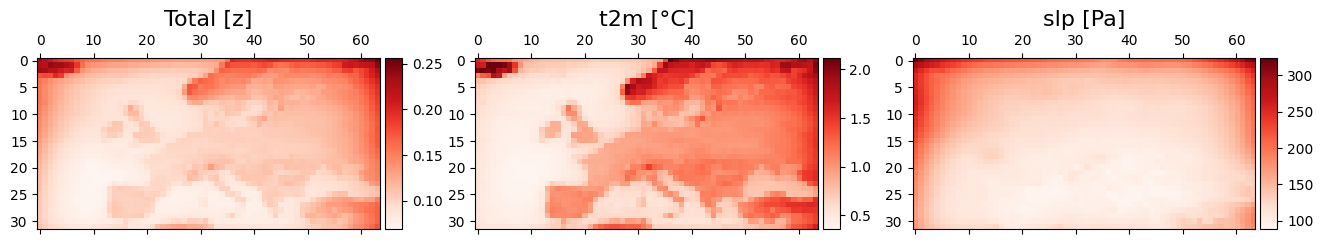

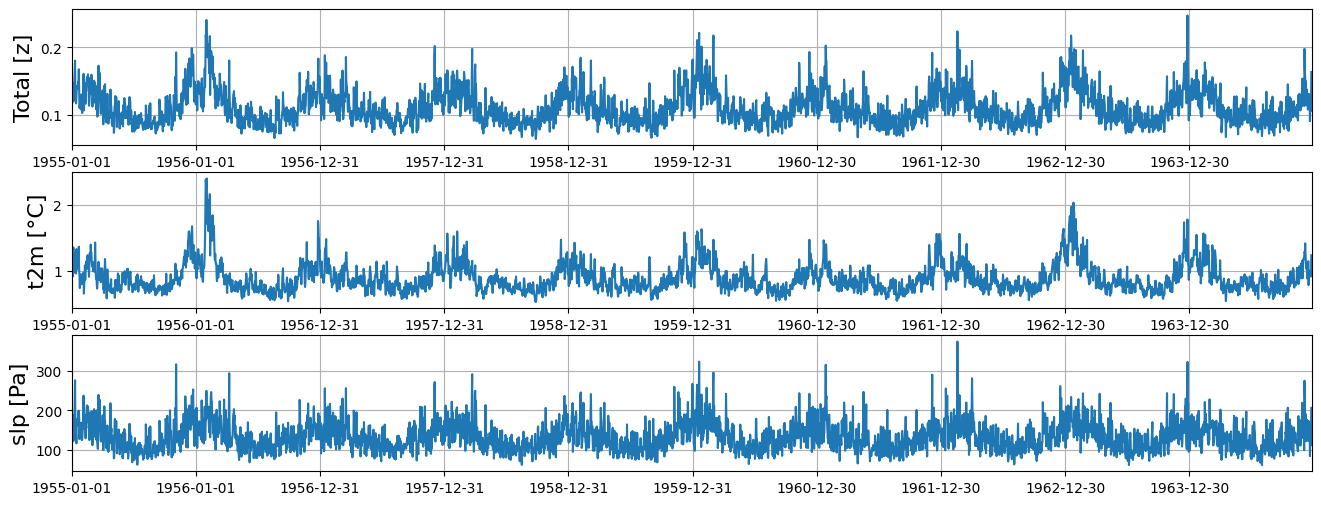

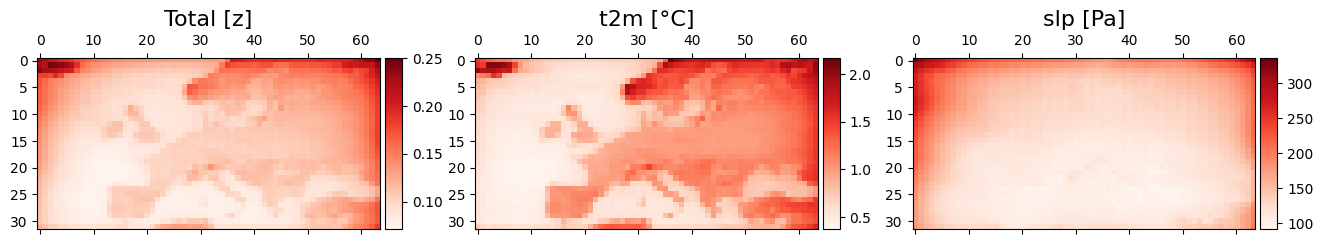

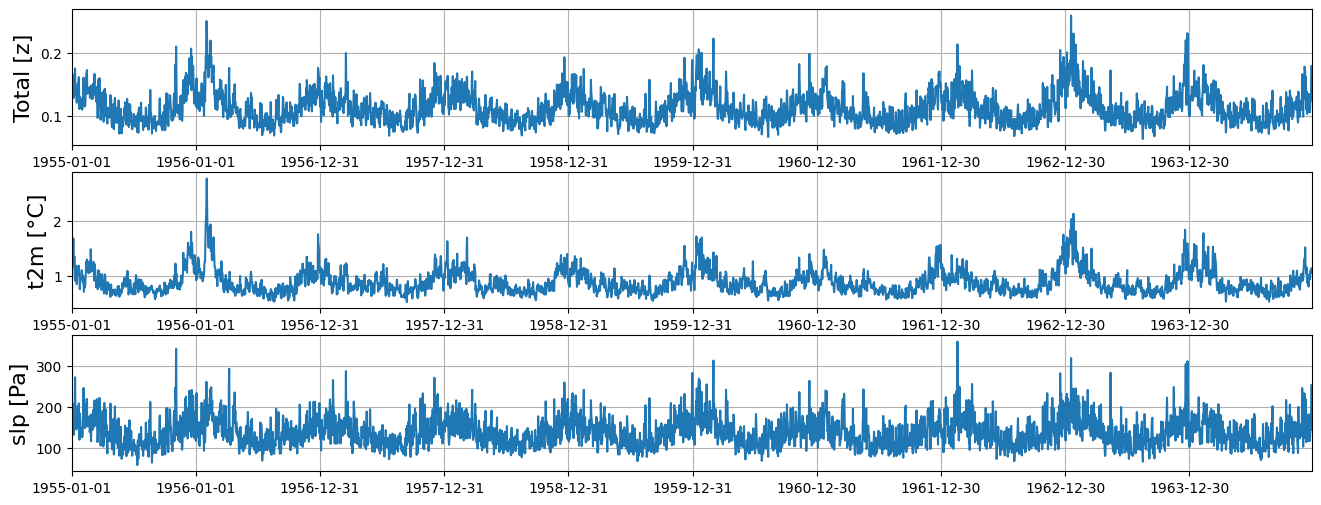

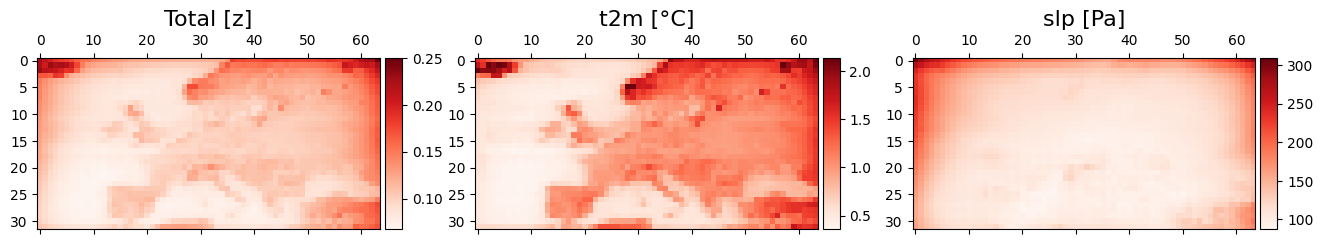

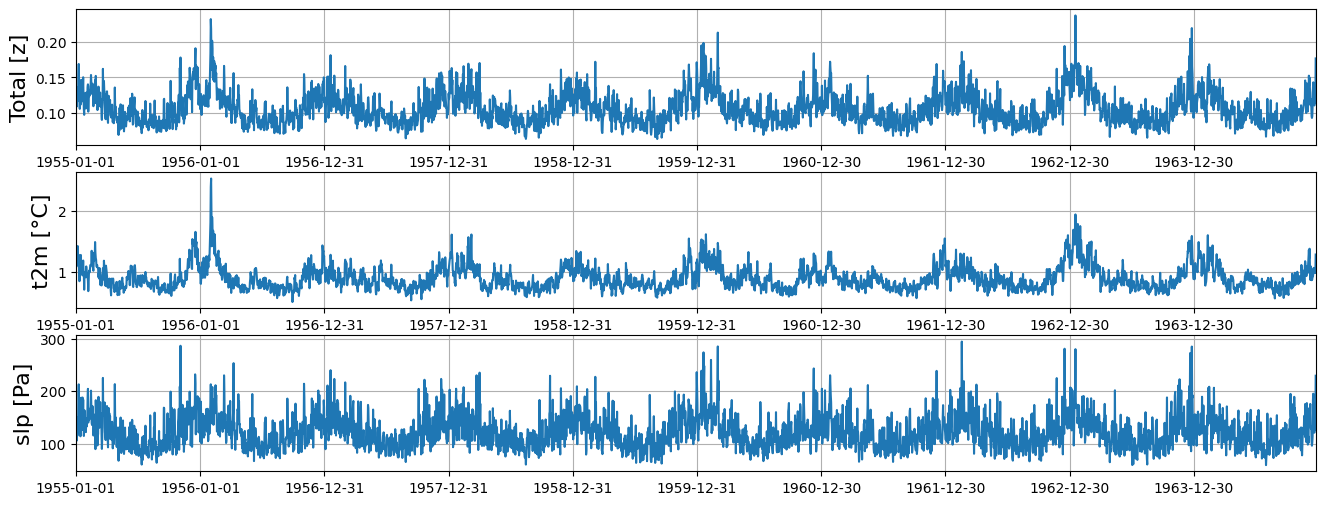

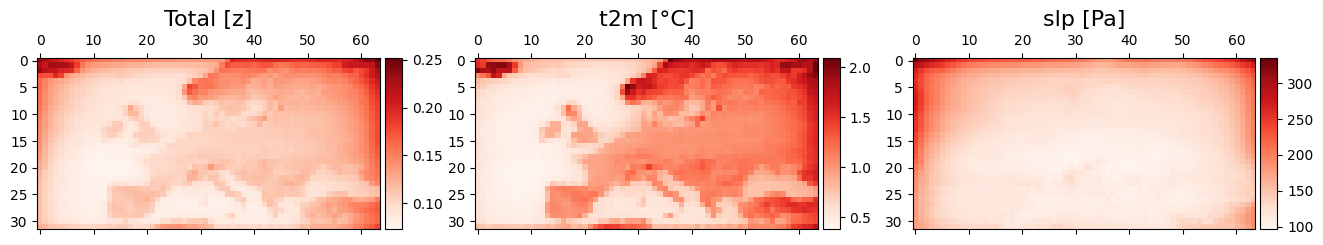

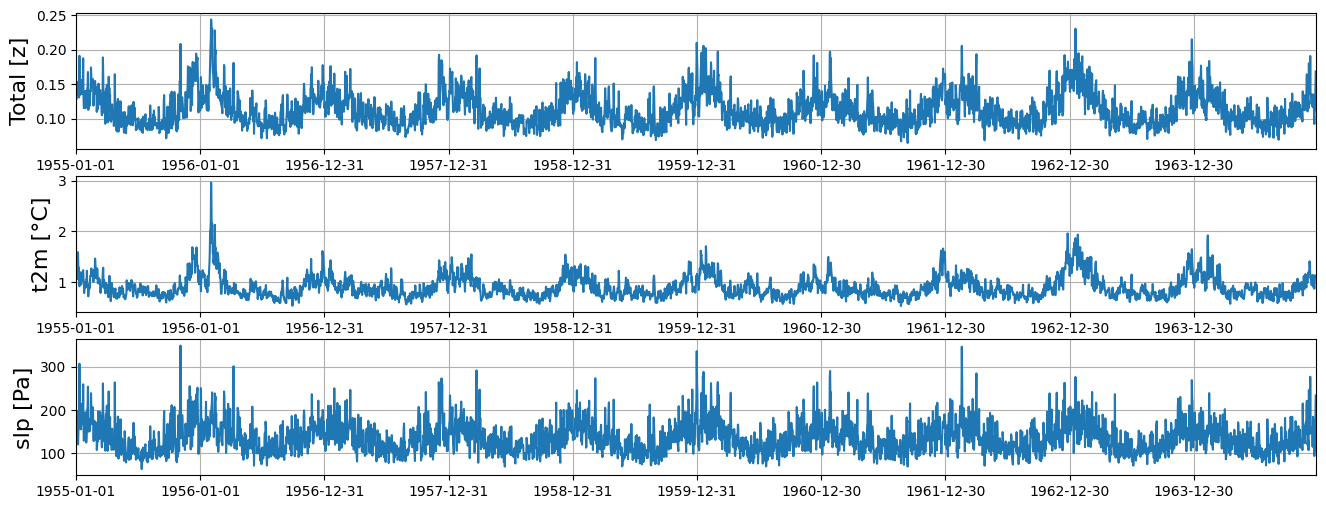

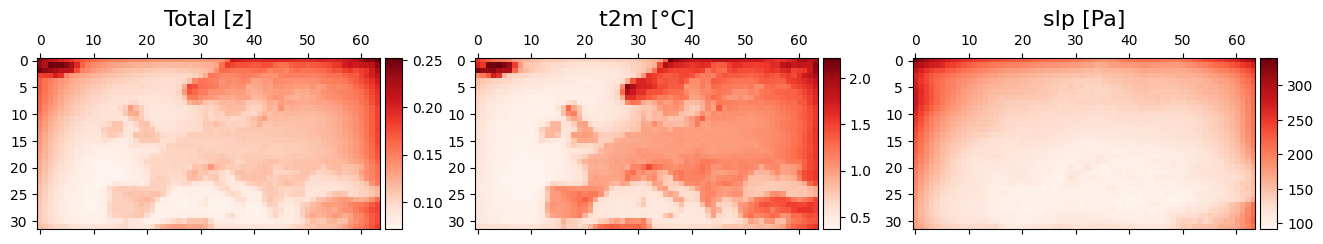

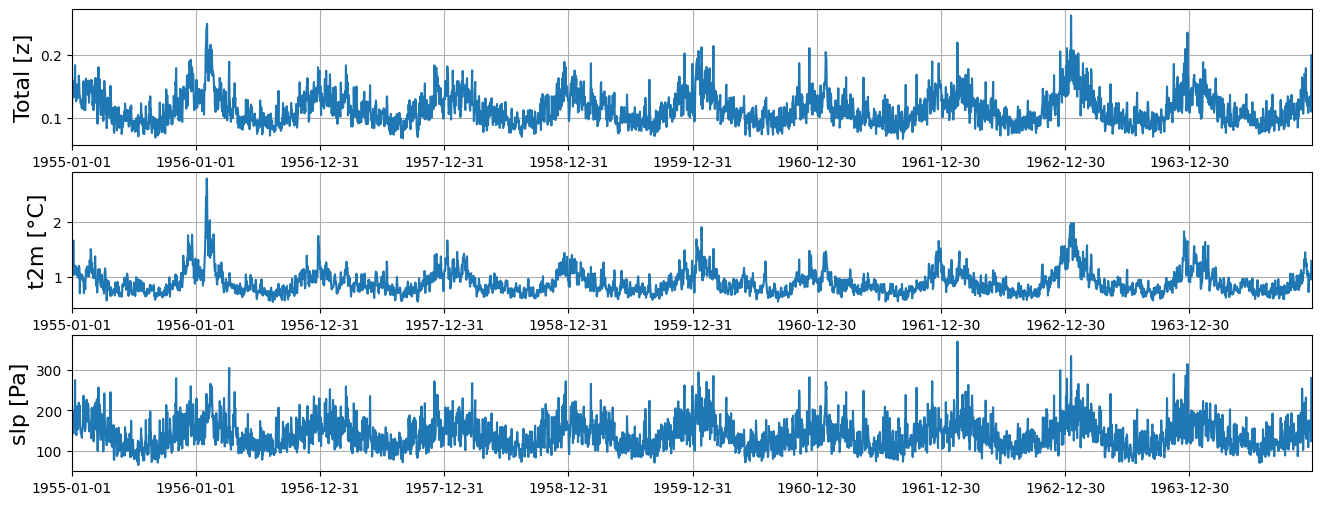

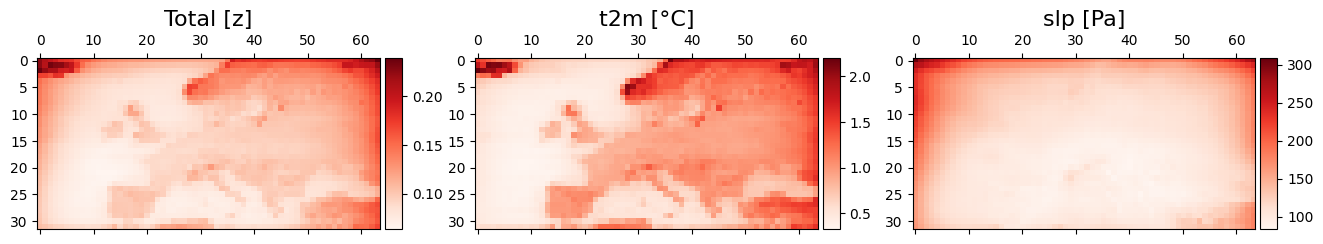

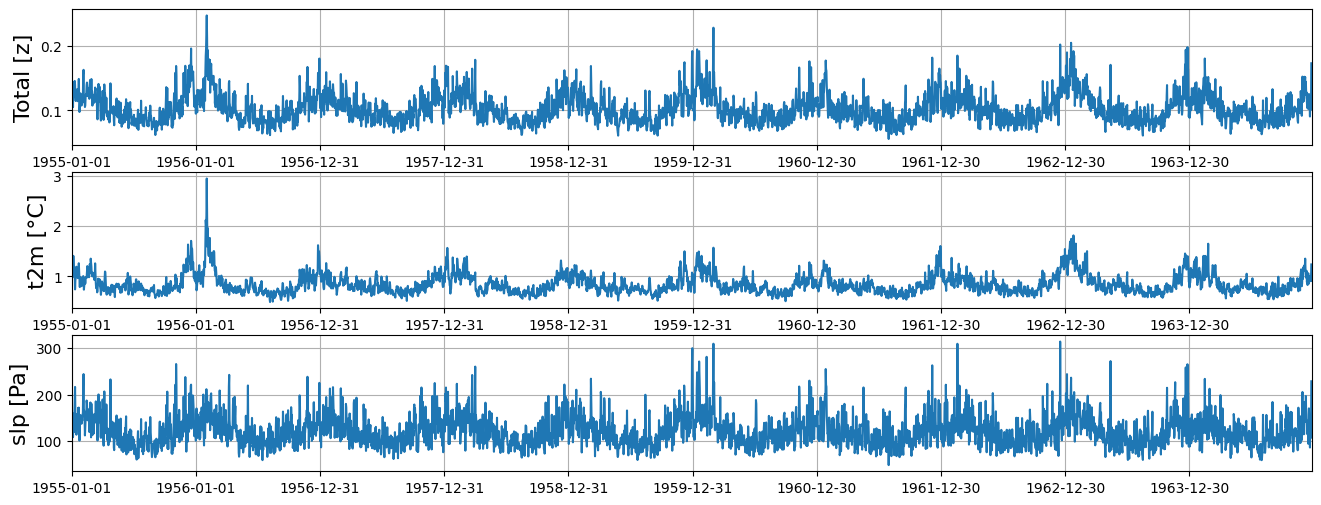

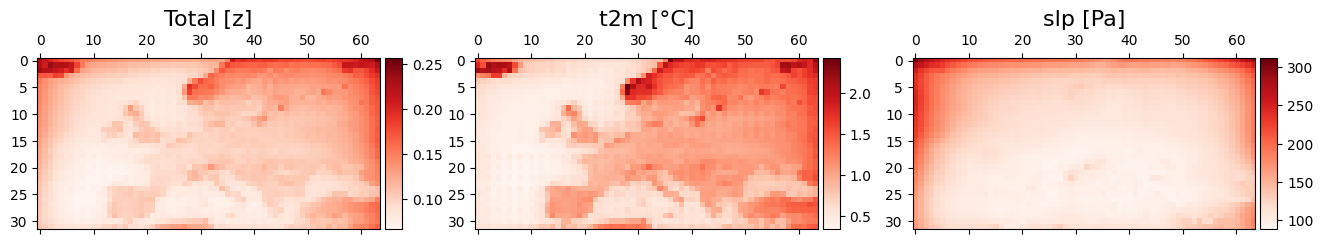

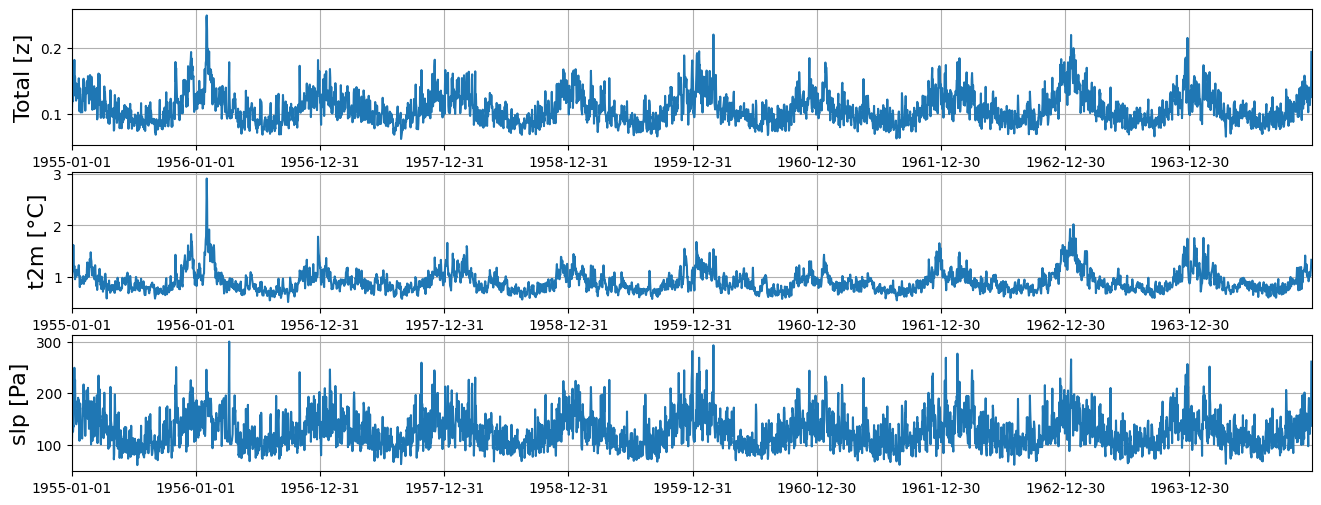

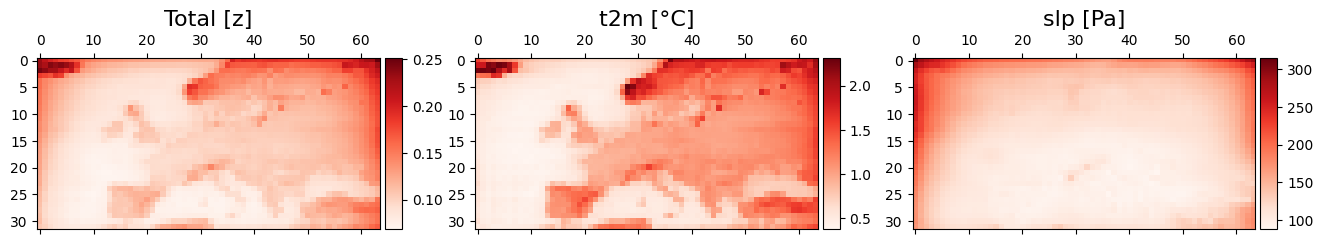

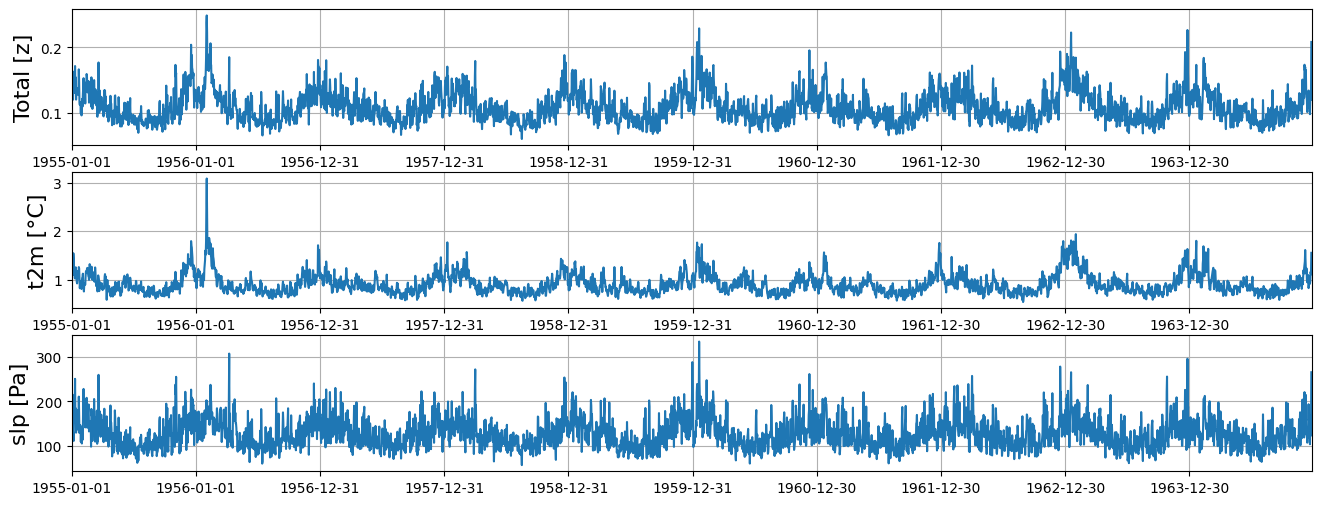

In [5]:
for ex_name in METHODS:
    print(f"\n\n\n=== {ex_name} ===")
    
    errors_path = f"./{ex_name}/errors/"
    
    # SPATIAL
    spat_total_err = np.load(errors_path + "spat_total_err_99p.npy")
    spat_t2m_err = np.load(errors_path + "spat_t2m_err_99p.npy")
    spat_slp_err = np.load(errors_path + "spat_slp_err_99p.npy")
    
    print(f"Total error: {np.mean(spat_total_err)}")
    print(f"Average t2m error: {np.mean(scale_t2m_back(spat_t2m_err, for_error=True))}")
    print(f"Average slp error: {np.mean(scale_slp_back(spat_slp_err, for_error=True))}")
    
    visualize_quantitative_spatial(spat_total_err,
                                   spat_t2m_err,
                                   spat_slp_err,
                                   scale_back=True,
                                   save_file_name=FIGURE_PATH + f"spatial_{ex_name}.png")
    
    # TEMPORAL
    temp_total_err = np.load(errors_path + "temp_total_err_99p.npy")
    temp_t2m_err = np.load(errors_path + "temp_t2m_err_99p.npy")
    temp_slp_err = np.load(errors_path + "temp_slp_err_99p.npy")
    
    visualize_quantitative_temporal(temp_total_err,
                                    temp_t2m_err,
                                    temp_slp_err,
                                    scale_back=True,
                                    save_file_name=FIGURE_PATH + f"temporal_{ex_name}.png")
    